### Grammar learning in children

This notebook simulates data for a study on learning artificial grammar in children.

Study design: Daniela Schönberger
Modelling: Clara Kuper

*Children are presented with a sequence of elements (colours, animals, fruits) that follow a defined gramatical structure. The grammar is defined in Schiff and Katan (2014), Fig 1C; and in Reber (1967). After learning by passivly watching grammatical sequences participants make a forced choice between two sequences, which of the presented sequences is grammatically valid. If the responses are repeatedly correct, the sequence is elongated resulting in a harder discrimination. If responses are repeatedly incorrect, the sequence is shortened.*
 
###########

*Difficulty levels* 
4 levels: 
1 = sequences with 3-4 items 
2 = sequences with 4-5 items 
3 = sequences with 5-6 items 
4 = sequences with 6-7 items

*Adaptation rule*
0-1 trial correct: easier
2-3 trials correct: same
4-5 trials correct: harder

###########

#### Open Question:

How can we develop a score for the responses that captures the differences in difficulty over different levels?
(3 responses correct in level 2 are 'better' than 3 responses correct in level 1)

Problems: levels overlap (length 4 appears in level 1 an level 2)

*Adaptive scores (ideas)*

*Idea 1*
score = level - wrong answers/trials
summed up / averaged for one session

*Idea 2*
score = sum over length of "correctly answered" trains

*Idea 3*
comupte difficulty of grammar with n elements

score = sum over difficulty of "correctly answered" trains


In [1]:
# Libraries needed

import random as rd
import matplotlib.pyplot as plt
import math as m
import pandas as pd

In [2]:
# Define levels
levels = [[3,4],[4,5],[5,6],[6,7]]

# Define experiement blocks and trials
nblock = 8
ntrial = 5

In [3]:
# a decimal range function
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

In [4]:
# a logistic response function from 1 to 0

def resp_psychometric(x,k,x0): 
    'This function returns the probability for a correct response as a logistic response function. \
    It depends on the parameters: \nx = input value \nk = slope \nx0 = midpoint'
    fx = 1-(1/(1+(m.e**(-k*(x-x0)))))
    fx = 0.5 + 0.5*fx
    return fx

# a list to nicely plot the function with continuous input values

def make_list(start,stop,slope,reflect):
    psych_list = []

    for v in frange(start,stop,0.1):
        psych = resp_psychometric(v,slope,reflect)
        psych_list = psych_list + [psych]
    
    return psych_list

In [5]:
# function that decides if the level remains or not
def define_level(data,level):
    'depends on the cut-off-values that are being set here'
    if data >= 4:
        if level < 3:
            return level+1
        else: 
            return level
    if data <= 1:
        if level > 0:
            return level-1
        else:
            return level
    else:
        return level

In [6]:
# Define class kid
class Kid():
    # define attributes of the kid
    'a class that holds the properties name, age and response parameters \
    psych_curve and psych_reflect. \
    Learning parameters set the logistic response function and should be modulated with learning \
    Suggested range for psych_curve: > 0 to 10  \
    Suggested range for psych_reflection: >= shortest element, <= than longest element'
   
    def __init__(self, name, age, psych_curve, psych_reflect):
        self.name          = name
        self.age           = age
        self.psych_curve   = psych_curve
        self.psych_reflect = psych_reflect

    # define testing
    def test_block(self, level_test, n_trial):
        
        # reset the number of correct responses in block
        change_level = 0
        
        # empty data frame to be filled
        data = pd.DataFrame('NA', index=range(ntrial), columns=['trial','response', 'length', 'level', 'block'])
        
        # loop through trials
        for trial in range(n_trial):
            
            # how long is the sequence
            length = rd.sample(level_test,1)[0]
            
            # how difficult is the response based on the length
            prob_correct  = resp_psychometric(length,self.psych_curve,self.psych_reflect)
            
            # get correct (1)/incorrect (0) answer
            answer = rd.choices(population=[1,0],weights=[prob_correct,1-prob_correct],k=1)
            
            # sum over block
            change_level = change_level+answer[0]
            
            # save to output
            data.iloc[trial]['trial']      = trial
            data.iloc[trial]['response']   = answer[0]
            data.iloc[trial]['length']     = length 
        
        return change_level, data

In [7]:
# Define experiement
def run_experiment(nblock, ntrial, kid):

    # Start at level one
    level = 0
    
    # Empty data frame
    raw_data = pd.DataFrame('NA', index=[], columns=['trial', 'response', 'length', 'level', 'block'])
    
    # Loop through blocks
    for block in range(nblock):
        
        # each block returns response data and a new level
        change_level, new_data = kid.test_block(levels[level],ntrial)
        
        # save number of the block to output
        new_data['block'] = block
        new_data['level'] = level
        raw_data   = pd.concat([raw_data, new_data])
        
        # new level for next block
        level = define_level(change_level,level)
    
    # return output         
    return raw_data

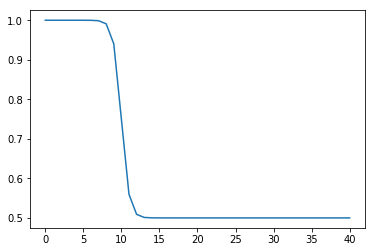

In [8]:
# Experiment setup
# Define the parameters for the participant:

slope_of_function   = 1   # "0" flat line, 0 - 1 approx. linear, 
                          # higher values reflect steeper switch between 0 and 1
                          # negative values reverse response
point_of_reflection = 4   # 75% correct responses at this length
min_length          = 3   # the shortest sequence is that long
max_length          = 7   # the longest sequence is that long

# show the responses for better overview
simulated_list = make_list(min_length,max_length,slope_of_function,point_of_reflection)
plt.plot(simulated_list);
plt.show()   # don't be confused by the x-axis, the numbers reflect instances of numbers 
             # drawn between min_length and max_length with 0.1 steps

In [9]:
# define participant
Lucy = Kid('Lucy', 9, slope_of_function, point_of_reflection)

# run experiment
data = run_experiment(nblock,ntrial,Lucy)

# show simulated raw data
print(data)


  trial response length level block
0     0        1      4     0     0
1     1        1      3     0     0
2     2        1      3     0     0
3     3        0      4     0     0
4     4        1      3     0     0
0     0        1      5     1     1
1     1        1      4     1     1
2     2        1      4     1     1
3     3        1      5     1     1
4     4        0      5     1     1
0     0        0      5     2     2
1     1        0      5     2     2
2     2        0      5     2     2
3     3        0      6     2     2
4     4        0      6     2     2
0     0        0      5     1     3
1     1        1      5     1     3
2     2        0      5     1     3
3     3        0      5     1     3
4     4        1      5     1     3
0     0        0      5     1     4
1     1        1      4     1     4
2     2        1      4     1     4
3     3        0      5     1     4
4     4        1      4     1     4
0     0        1      4     1     5
1     1        0      4     

In [10]:
# Performance score

# Score idea 1:
def score1(data):
    'returns a score computed by the difference in an assigned level and the proportion of wrong answers/block \
    data   = panda data frame'
    
    # compute level for each block
    full_score = 0
    for b in range(max(data['block'])+1):
        block_data = data.query(f'block == {b}')
        level      = block_data['level'][0]+1
        score      = level - (1- sum(block_data['response']))/ntrial
        full_score = full_score + score

    exp_score = full_score/nblock
    
    return exp_score
    
# Score idea 2:

def score2(data):
    'returns the sum of correctly solved elements'
    elements_correct = data['response']*data['length']
    sum_correct = sum(elements_correct)
    
    return sum_correct/ntrial  

In [11]:
# Compare score1 and score2 for different reflection points x0

# shift x0 from 3 to 7, compute score1 and score2 and plot

# Simulate for x experiments
score_data = pd.DataFrame('NA', index=[], columns=['reflection_point', 'score1', 'score2'])
slope      = 1
repeats    = 100

for point in range(3,8):
    Baby = Kid('Baby',6, slope, point)
    point_data = pd.DataFrame('NA', index=range(repeats), columns=['reflection_point', 'score1', 'score2'])
    
    for participant in range(repeats):
        data = run_experiment(nblock,ntrial,Baby)
        
        s1   = score1(data)
        s2   = score2(data)
            
        point_data.iloc[participant]['reflection_point'] = point
        point_data.iloc[participant]['score1'] = s1
        point_data.iloc[participant]['score2'] = s2
               
    score_data = pd.concat([score_data,point_data])    

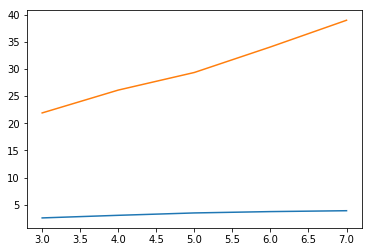

In [13]:
# Analyse output from simulated scores

# mean score for each reflection level
analyse_scores = pd.DataFrame('NA', index=[], columns=['reflection_point', 'mean_score1', 'mean_score2'])

for point in range(3,8):
    mean_scores = pd.DataFrame('NA', index=[0], columns=['reflection_point', 'mean_score1', 'mean_score2'])
    subset         = score_data.query(f'reflection_point == {point}')
    
    mean_scores.iloc[0]['reflection_point'] = point
    mean_scores.iloc[0]['mean_score1']      = sum(subset['score1'])/100
    mean_scores.iloc[0]['mean_score2']      = sum(subset['score2'])/100
    
    analyse_scores = pd.concat([analyse_scores,mean_scores])

plt.plot(analyse_scores['reflection_point'],analyse_scores['mean_score1']);

plt.plot(analyse_scores['reflection_point'],analyse_scores['mean_score2']);
plt.show()
